<a href="https://colab.research.google.com/github/Vinni1798/Airbnb-Booking-capstone-project/blob/main/Airbnb_Booking_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Import of Python Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
%matplotlib inline
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

# **Path of DataFrame** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgqv68fxD13oRHy6rqIb-iRimVzHsYfh-jxN3nDxmtwxG7oOb8rJ8E


In [ ]:
dir_path = '/content/drive/MyDrive/Almabetter/Kailash/captone project/Airbnb NYC 2019.csv'
df = pd.read_csv(dir_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Describing the columns of the DataFrame**

### ***Columns of the DataFrame***

---


### ***Id-***It is listing id. Whenever a host list its property on Airbnb, a unique id is created, since every id is unique there are 458895 unique id.
### As per my observation ,every listing is a listing of unique properties.(means the same property is not listed more than 1)

###  ***Name*** **-** It is the property description. Two properties can have the same name, but they are not the same property, every property in the data are unique, as all of them are having different longitude and latitude, that means every properties are situated in different location. 

###  ***host_id-*** Its the identity id given to individual host (For example- two different host cant have the same host_id). So if we want to count the number of host, we count the unique host_id.

### ***Neighbourhood_group-*** This are the 5 Boroughs of New York city, in which the property is located.

###  ***Neighbourhood-*** This are the towns and villages in New York

###  ***Room_type-*** Types of properties 

###  ***Price-***  Property price per day

###  ***Minimum_nights-*** It is the minimum number of night you can book a property,( example-1 year rental contract)

###  ***Number_of_reviews-*** Total number of reviews 

###  ***Calculated_host_listing_count-*** The number of times the host has listed its property.
###  ***Availabilitty_365-*** The number of days the property were available for booking.

# **Checking the sanity of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## **Check and sum the number of  NaN values  present in each columns**

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### **Clean the Dataset**

## **Replace NaN values present in 'name' column by 'name not found'**

In [ ]:
df.loc[df['name'].isna(), 'name']=df.loc[df['name'].isna(), 'name'].apply(lambda x: "name not found")

## **Fill NaN values present in 'host_name' column by "no name"**

In [ ]:
df.loc[df['host_name'].isna(), 'host_name']=df.loc[df['host_name'].isna(), 'host_name'].apply(lambda x: "no name")

## **Replace NaN values present in 'last_review' column by 0**

In [ ]:
df.loc[df['last_review'].isna(), 'last_review']=df.loc[df['last_review'].isna(), 'last_review'].apply(lambda x: 0)

## **Replace NaN values present in 'reviews_per_month' column by 0**

In [ ]:
df.loc[df['reviews_per_month'].isna(), 'reviews_per_month']=df.loc[df['reviews_per_month'].isna(), 'reviews_per_month'].apply(lambda x: 0)

## **Drop unecessary  column like "id"** 






In [ ]:
df.drop(['id'], axis=1,inplace=True)

## **Verify cleaned Data**

In [ ]:
df.isna().sum()  #no NaN vlaues present in any of these columns 

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## **If price is 0 , replace it by the average price of all similar room_type with similar neighbourhood_group**

In [ ]:
#Considering 3 column of the dataframe df
df1=df[['neighbourhood_group','room_type','price']]

#Create dataframe df2 containig price greater than zero
df2=df1[df1.price!=0]

# groupby neighbourhood_group and room_type, And find there average price 
df3=df2.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
df3

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [ ]:
# Creat function to extract average price from dataframe df3
def fun(neighbourhood_group,room_type):
 avg_price=df3.loc[neighbourhood_group,room_type]
 return avg_price

In [ ]:
# Repllace 0 price by the average price from the dataframe df3
df['price']=df.apply(lambda x: fun(x['neighbourhood_group'],x['room_type'])  if x['price']==0 else x['price'], axis=1 )

In [ ]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.00000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.74227,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.14635,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,10.00000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.00000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.00000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.00000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.00000,1250.000000,629.000000,58.500000,327.000000,365.000000


## **Find the outliers of price column**

**We need to use groupby and box plot method**

In [ ]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack() #unstack converts the stack data into unstacked format and present it in DF form

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'Average room price')

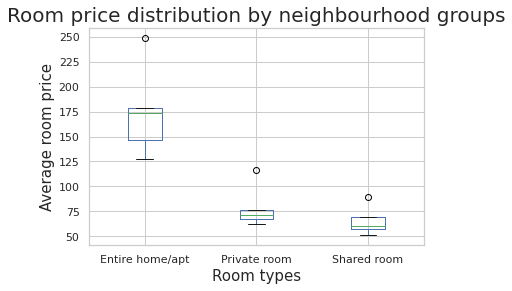

In [ ]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot(kind='box')
plt.title("Room price distribution by neighbourhood groups", fontsize=20)
plt.xlabel("Room types", fontsize =15)
plt.ylabel("Average room price", fontsize =15)

**Finding outliers values and its count**

In [ ]:
Q1 =  df['price'].quantile(0.25) #25%
Q3 = df['price'].quantile(0.75) # 75%
IQR = Q3 - Q1


In [ ]:
df[(df['price'] < Q1-1.5*IQR ) | (df['price'] > Q3+1.5*IQR)]['price']

61       375.0
85       800.0
103      500.0
114      350.0
121      400.0
         ...  
48758    350.0
48833    475.0
48839    800.0
48842    350.0
48856    345.0
Name: price, Length: 2972, dtype: float64

In [ ]:
df[(df['price'] < Q1-1.5*IQR ) | (df['price'] > Q3+1.5*IQR)]['price'].count()

2972

**To remove outliers from our data set** 

In [ ]:
outliers = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df= df.loc[outliers]  

In [ ]:
df.shape

(45923, 15)

# **Do basic inspection of your DataFrame**

In [ ]:
df.shape

(45923, 15)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45923 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            45923 non-null  object 
 1   host_id                         45923 non-null  int64  
 2   host_name                       45923 non-null  object 
 3   neighbourhood_group             45923 non-null  object 
 4   neighbourhood                   45923 non-null  object 
 5   latitude                        45923 non-null  float64
 6   longitude                       45923 non-null  float64
 7   room_type                       45923 non-null  object 
 8   price                           45923 non-null  float64
 9   minimum_nights                  45923 non-null  int64  
 10  number_of_reviews               45923 non-null  int64  
 11  last_review                     45923 non-null  object 
 12  reviews_per_month               

In [ ]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0,0.0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0,0.0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0,0.0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0,0.0,6,2
48894,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90.0,7,0,0,0.0,1,23


In [ ]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.592300e+04,45923.000000,45923.000000,45923.00000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000
mean,6.632693e+07,40.728488,-73.950733,119.99330,6.938070,23.942665,1.107739,6.639701,109.378699
std,7.755778e+07,0.055331,0.046471,68.13185,19.857823,45.315219,1.612657,31.008148,130.279393
min,2.438000e+03,40.499790,-74.244420,10.00000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.724081e+06,40.689235,-73.981925,65.00000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,3.028359e+07,40.721770,-73.954370,100.00000,2.000000,5.000000,0.380000,1.000000,39.000000
75%,1.055068e+08,40.763390,-73.934315,159.00000,5.000000,24.000000,1.620000,2.000000,217.000000
max,2.743213e+08,40.913060,-73.712990,334.00000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **EDA and Visualization Analysis**

# **Count of  Airbnb properties in different neighbourhood_groups** 

In [ ]:
neigh_count_df= df.groupby(['neighbourhood_group'])['name'].count().reset_index().sort_values('name',ascending=False)
airbnb_neigh_count_df= neigh_count_df.rename(columns={'name':'counts'})
#airbnb_neigh_count_df
df5=df.groupby(['neighbourhood_group'])['name'].count()
airbnb_neigh_count_df

,neighbourhood_group,counts
2,Manhattan,19506
1,Brooklyn,19415
3,Queens,5567
0,Bronx,1070
4,Staten Island,365


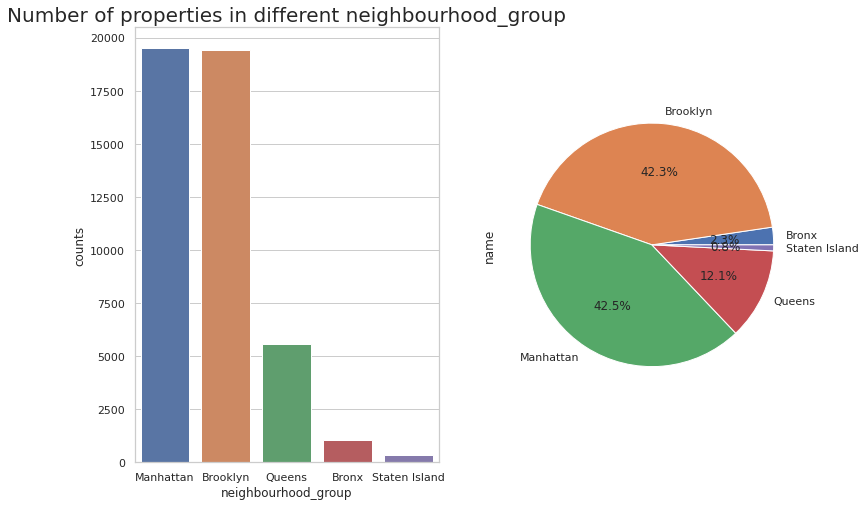

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(x=airbnb_neigh_count_df.neighbourhood_group, y=airbnb_neigh_count_df.counts).set_title('Number of properties in different neighbourhood_group', fontsize=20)
#sns.barplot(x="neighbourhood_group", y="counts", data=airbnb_neigh_count_df).set_title(" Neighbourhood groups count", fontsize=20)
plt.subplot(1,2,2)
df5.plot.pie(autopct="%.1f%%")



*  Manhattan neighbourhood_group has most number(43.5%) of Airbnb properties
*   Staten Island	 neighbourhood_group has least number(1%)of Airbnb properties



# **Counts of room types**


In [ ]:
df1= df['room_type'].value_counts().reset_index()
rooms_count =df1.rename(columns={'index':"room_type",'room_type':'counts'})
df5=df.groupby(['room_type'])['name'].count()
rooms_count

,room_type,counts
0,Entire home/apt,22789
1,Private room,21996
2,Shared room,1138


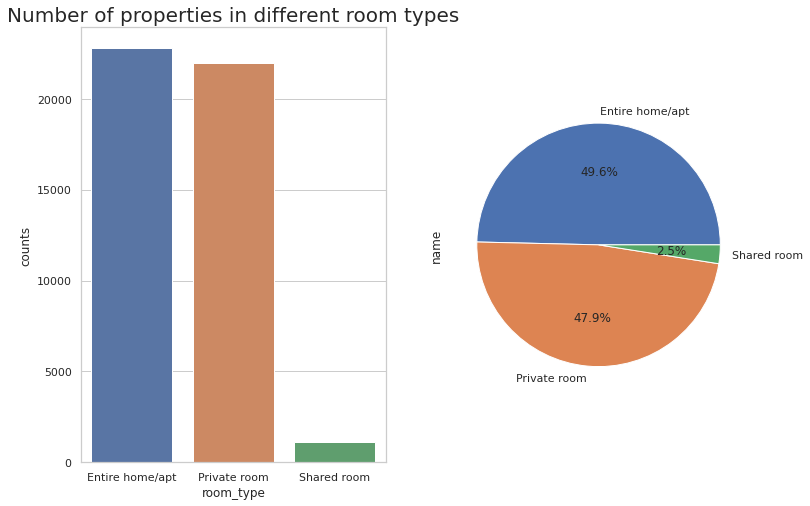

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(x=rooms_count.room_type, y=rooms_count.counts).set_title('Number of properties in different room types', fontsize=20)
#sns.barplot(x="neighbourhood_group", y="counts", data=airbnb_neigh_count_df).set_title(" Neighbourhood groups count", fontsize=20)
plt.subplot(1,2,2)
df5.plot.pie(autopct="%.1f%%")

*  Entire home/apt, room type has most number(52%) of properties followed by private room type
*  Shared room type has least number(2.5%) of properties

# **Average price of properties**

In [ ]:
avrg_room_price_df = df.groupby(['room_type'])['price'].mean().reset_index().rename(columns={'price':'avrg_price'})

avrg_neigh_df = df.groupby(['neighbourhood_group'])['price'].mean().reset_index().rename(columns={'price':'avrg_price'})

avrg_price_df= df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index().rename(columns={'price':'avrg_price'})

display(avrg_room_price_df),display(avrg_neigh_df),display(avrg_price_df)

,room_type,avrg_price
0,Entire home/apt,162.545860
1,Private room,79.042424
2,Shared room,59.382731


,neighbourhood_group,avrg_price
0,Bronx,77.427935
1,Brooklyn,105.737686
2,Manhattan,145.965614
3,Queens,88.904437
4,Staten Island,89.235616


,neighbourhood_group,room_type,avrg_price
0,Bronx,Entire home/apt,112.195592
1,Bronx,Private room,60.698906
2,Bronx,Shared room,47.254237
3,Brooklyn,Entire home/apt,148.222025
4,Brooklyn,Private room,70.329087
5,Brooklyn,Shared room,48.283570
6,Manhattan,Entire home/apt,181.710666
7,Manhattan,Private room,98.057700
8,Manhattan,Shared room,75.939785
9,Queens,Entire home/apt,131.328388


(None, None, None)

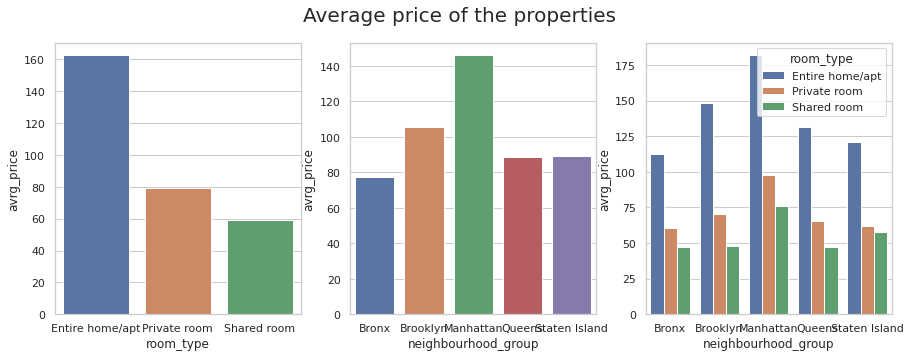

In [ ]:
plt.figure(figsize=(15,5)).suptitle('Average price of the properties', fontsize=20) 

plt.subplot(1,3,1)
sns.barplot(x="room_type", y="avrg_price",data=avrg_room_price_df)

plt.subplot(1,3,2)
sns.barplot(x="neighbourhood_group", y="avrg_price",data=avrg_neigh_df)

plt.subplot(1,3,3)
sns.barplot(x="neighbourhood_group", y="avrg_price",hue='room_type',data=avrg_price_df)


*   Entire home or apartment room type has the heighest average room price  followed by private room type
*   Manhattan neighbourhood is expensive than the others with average room price of 145$ Bronx neighbourhood is least expensive 



# **Count the number of unique hosts listed on Airbnb**

 

*    Since 2 different host can have the same host_name, so we use host_id.

*    host id is unique for induvidual host




In [ ]:
unique_host_id =df['host_id'].value_counts().reset_index().rename(columns={'index':'host_id','host_id':'listing_counts'})
unique_host_id

,host_id,listing_counts
0,219517861,272
1,107434423,180
2,137358866,103
3,12243051,95
4,30283594,95
...,...,...
35384,95485067,1
35385,167560332,1
35386,263742622,1
35387,205706382,1



*  This shows the count of listings of particular host id on Airbnb.
But we want total number of unique host ids 
*   We apply lenght function to above dataframe to get total number of unique host ids



In [ ]:
len(unique_host_id)

35389

**Airbnb has 37457 unique host ids or host owner** 

# **Availability percentage of properties in different neighbourhood_group**

In [ ]:
df25=df.groupby(['neighbourhood_group','room_type']).agg({'availability_365':'sum','room_type':'count'}).rename(columns={'room_type':'property_count'})
df25['availabilty_%_365'] = (df25['availability_365']*100)/(df25['property_count']*365)
df25


availability_365  ...  availabilty_%_365
neighbourhood_group room_type                          ...                   
Bronx               Entire home/apt             56198  ...          42.415185
                    Private room               110902  ...          46.889058
                    Shared room                  8984  ...          41.718133
Brooklyn            Entire home/apt            836656  ...          25.634178
                    Private room              1002581  ...          27.298721
                    Shared room                 73153  ...          48.763790
Manhattan           Entire home/apt           1236258  ...          29.989448
                    Private room               763708  ...          27.008528
                    Shared room                 65410  ...          38.538813
Queens              Entire home/apt            259421  ...          35.150468
                    Private room               499341  ...          40.825352
                    Shared room                 37425  ...          52.852704
Staten Island       Entire home/apt             29822  ...          48.633399
                    Private room                42556  ...          62.016905
                    Shared room                   583  ...          17.747336

[15 rows x 3 columns]

In [ ]:
df25=df.groupby(['neighbourhood_group']).agg({'availability_365':'sum','room_type':'count'}).rename(columns={'room_type':'property_count'}).reset_index(False)
df25['availabilty_%_365'] = (df25['availability_365']*100)/(df25['property_count']*365)
df25



,neighbourhood_group,availability_365,property_count,availabilty_%_365
0,Bronx,176084,1070,45.086161
1,Brooklyn,1912390,19415,26.986478
2,Manhattan,2065376,19506,29.009353
3,Queens,796187,5567,39.183299
4,Staten Island,72961,365,54.765247


[Text(0.5, 1.0, 'Percentage availability of neighbourhood groups')]

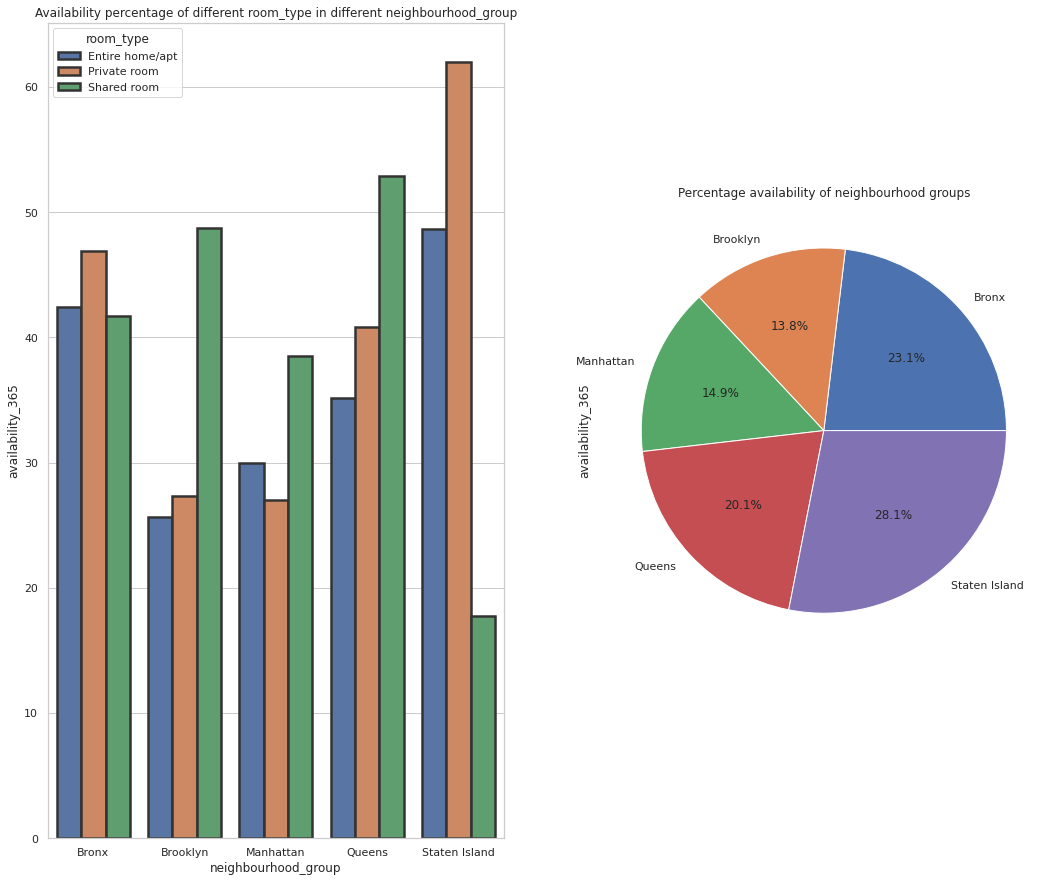

In [ ]:
plt.figure(figsize=(18,15))
df1=df.groupby(['neighbourhood_group'])['availability_365'].apply(lambda x: (x.sum()*100)/(365*x.count()))
df2=df.groupby(['neighbourhood_group','room_type'])['availability_365'].apply(lambda x: (x.sum()*100)/(365*x.count())).reset_index()

plt.subplot(1,2,1)
sns.barplot(x=df2.neighbourhood_group, y=df2.availability_365, hue=df2.room_type,linewidth=2.5, edgecolor=".2"
                 ).set(title='Availability percentage of different room_type in different neighbourhood_group')
plt.subplot(1,2,2)
df1.plot.pie(autopct="%.1f%%").set(title='Percentage availability of neighbourhood groups')



*   Manhattan(15%)	and Brooklyn(14%) neighbourhood groups are least available. 
*  Due to its popularity and the region being  most populated these groups are busiest groups

*   If we deep dive in room types Private room and 	Entire home/apt room type are least available for booking  
*   Since shared rooms being cheaper its available percentage should be  least but this is not true(excluding Staten Island) beacuse pepople will not only consider price,even they look good facilities

*   As everthing is to be shared in shared rooms, due its lack of privacy people tend to look for other room types 










# **Top 5 host with maximum over all number of  total reviews** 

In [ ]:
df1=df.groupby(['host_id','host_name','neighbourhood_group','room_type']).agg({'number_of_reviews':'sum'}).reset_index().rename(columns={'number_of_reviews':'total_reviews'})

In [ ]:
df1.sort_values('total_reviews',ascending=False).head(5)

,host_id,host_name,neighbourhood_group,room_type,total_reviews
21116,37312959,Maya,Queens,Private room,2273
1077,344035,Brooklyn& Breakfast -Len-,Brooklyn,Private room,2205
20696,35524316,Yasu & Akiko,Manhattan,Private room,1837
21737,40176101,Brady,Brooklyn,Private room,1818
7323,4734398,Jj,Manhattan,Private room,1798


In [ ]:
df17=df[(df.host_id==37312959)|(df.host_id==344035)|(df.host_id==	26432133	)|(df.host_id==35524316	)|(df.host_id==40176101	)]

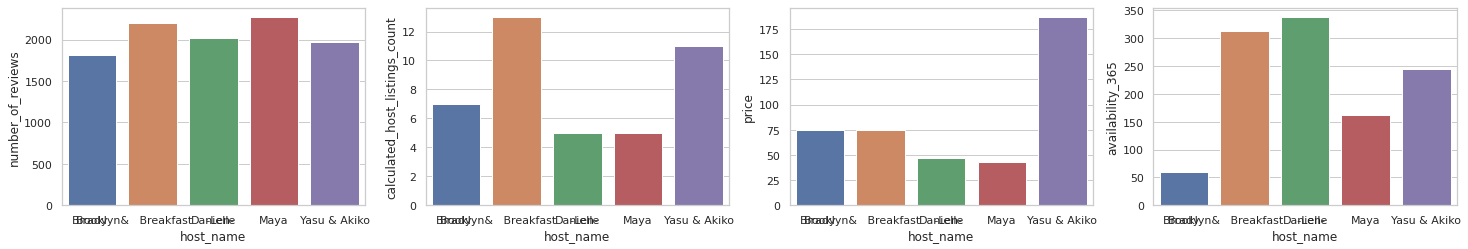

In [ ]:
df18=df17.groupby(['host_name'])['calculated_host_listings_count'].count().reset_index()
df19=df17.groupby(['host_name'])['number_of_reviews'].sum().reset_index()
df20=df17.groupby(['host_name'])['availability_365'].median().reset_index()
df21=df17.groupby(['host_name'])['price'].mean().reset_index()

plt.figure(figsize=(25,8))

plt.subplot(2,4,2)
sns.barplot(x=df18.host_name, y=df18.calculated_host_listings_count)

plt.subplot(2,4,1)
sns.barplot(x=df19.host_name, y=df19.number_of_reviews)

plt.subplot(2,4,4)
sns.barplot(x=df20.host_name, y=df20.availability_365)

plt.subplot(2,4,3)
sns.barplot(x=df21.host_name, y=df21.price)

In [ ]:
total_num_reviews = df1.sort_values('total_reviews',ascending=False).head(5)
total_num_reviews

,host_id,host_name,neighbourhood_group,room_type,total_reviews
21116,37312959,Maya,Queens,Private room,2273
1077,344035,Brooklyn& Breakfast -Len-,Brooklyn,Private room,2205
20696,35524316,Yasu & Akiko,Manhattan,Private room,1837
21737,40176101,Brady,Brooklyn,Private room,1818
7323,4734398,Jj,Manhattan,Private room,1798




*  Maya has the maximum  no of total reviews i.e 2273 , his average room rent price is around 45$ and available for 150 days out of 365 
*  Host's who is having private rooms as their room types  and the minimum_night stay is 1 nights ,are mostly to get more number of reviews   



# **Average minimum numbers of night of differtent room types** 

In [ ]:
mini=df.groupby(['room_type'])['minimum_nights'].mean().reset_index().sort_values('minimum_nights',ascending=False)
mini

,room_type,minimum_nights
0,Entire home/apt,8.541840
2,Shared room,6.522847
1,Private room,5.297963


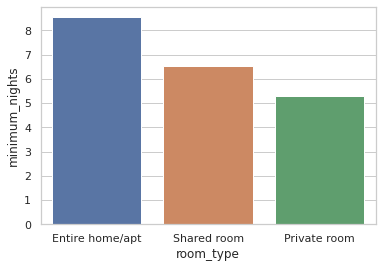

In [ ]:
sns.barplot(x='room_type',y='minimum_nights',data=mini)


*  Entire home/apt	room type have highest avaerage minimum night stay of 8 night stay 
*  Private room types have least least avaerage minimum night stay of 5 night stay 
